StyleSwin: Transformer-based GAN for High-resolution Image Generation
==============
**Authored by:** [Alpay Özkan](https://github.com/alpayozkan/), 
[Hıdır Yeşiltepe](https://github.com/yesiltepe-hidir) 

**Created:** 29.05.2022

**Last Modified:** 29.05.2022

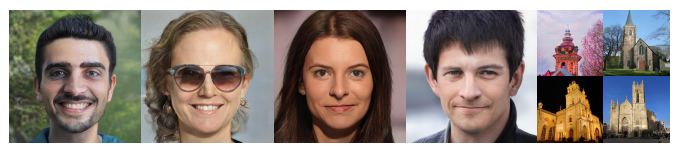

StyleSwin is a Transformer-based GAN architecture which combines the Swin Transformers idea into Generative Adverserial Networks in the sense that, Generator consists of Swin Transformer blocks.

~~~
                                                 What is new with this architecture?
~~~
There has been several attempts to apply transformer architecture into GAN architecture. Further, StyleSwin reaches a state of the art performance with the generation of **high resolution images**. To do this, general architecture is built on top of the StyleGAN architecture. Authors explicitly highlights the importance of local attention and its effect on providing a balance between computational efficiency and modelling capacity. To utilize this observation and enhance the receptive field , <font color = 'black'> Double Attention </font> mechanism is applied.
~~~
                                                 What is then Double Attention?
~~~
To see this , let's look at the figure below.

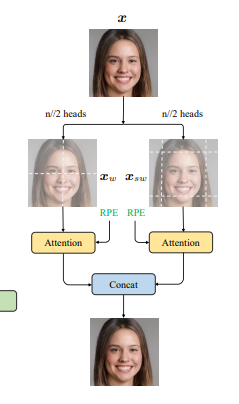

As illustrated in the above figure **N** attention heads splitted into 2 groups:
1. <font color = 'black'> Local Attention</font>
2. <font color = 'black'> Shifted Window Attention</font>


**Reuse**

This paper includes several big components that were highly sophisticated corresponding to separate papers and implementations. Overall we have designed our network pipeline, but we were stuck at some components which we could not fully grasp and implement independently. These components are related to swin architecture:

1. **Swin Transformer**

  We have re-used the original swin transformer implementation. \\

  Paper: \\
  https://arxiv.org/pdf/2103.14030.pdf \\
  Code: \\
  https://github.com/microsoft/Swin-Transformer/blob/main/models/swin_transformer.py \\

  We have taken modules:
  - window_partition
  - window_reverse
  - WindowAttention as BasicAttentionBlock

2. **Sinusodial Positional Encoding (SPE)**
  
  SPE is required and added on top of the input or starting noise before each Style-Swin-Block. However, we could not fully understand how to insert SPE in the context of GANs and in this regard we have identified a paper that is also referenced and adapted by styleswin paper.

  Paper: \\
  https://arxiv.org/pdf/2012.05217.pdf \\
  Code: \\
  https://github.com/open-mmlab/mmgeneration/blob/master/mmgen/models architectures/positional_encoding.py \\

  We have added 'sinusoidal_positional_embedding.py' in our directory which includes 'SinusoidalPositionalEmbedding' module for SPE manipulation.



**Network Pipeline**

**Generator**

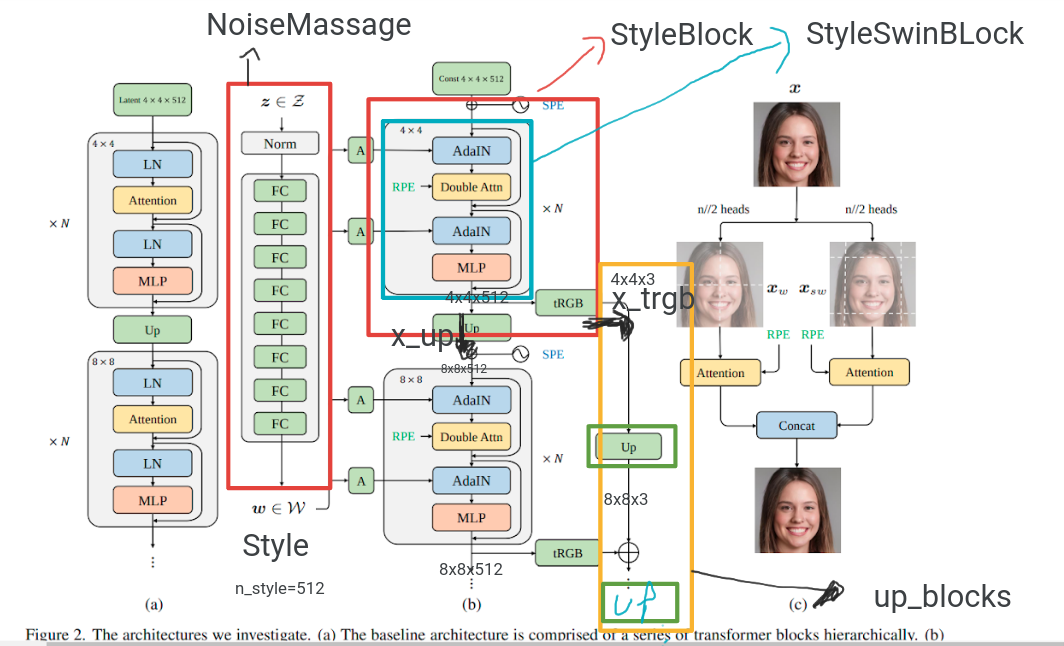

**NoiseMassage** \\
this is a standard network for styleGANs where a gaussian noise vector is introduced and knealded through several fcc layers. Final output signal is treated as the style vector which is fed to every styleblock stages.

**StyleBlock** \\
fundamental block in this architecture. It repeats for several layers depending on the resolution of the output image. It generates 2 signals: x_up and x_trgb. x_up is passed to the next styleblock and x_trgb is passed to an external up block. This processes continues in 2 branches. StyleBlock includes a skeleton block called StyleSwinBlock which is composed of 4 blocks.\\

**StyleSwinBlock**  \\
Composed of 4 main blocks.
1. adaIN
2. DoubleAttention
3. adaIN
4. MLP

There are 2 attention blocks inside double attention. One of them is window multihead-attention (W-MSA) and the other one is shifted-window multihead-attention (SW-MSA) as mentioned in swin transformer.

**up_blocks:** \\
it is the network that upsamples x_trgb tensors and adds with next x_trgb tensor. This process continues as there are number of style-blocks which will determine the shape of the output image. For example:

4x4x3 => 8x8x3 => 16x16x3 => ... => 256x256x3 => output img



**Discriminator**

~~~
                                                  What about Discriminator?
~~~

As discriminator directly affects the stability of training, Convolution based discriminator is used in StyleSwin. An important note here, when convolutions are replaced by transformer blocks, since modelling capacity increases, training becomes much more stable but this simple replacement doesn't lead to Transformer-GAN to compete with state of the art models.

~~~
                                         Is there any problems occured with Discriminator?
~~~
Due to simple architecture of the Discriminator there is a subtle problem with the generated images: <font color = 'pink'> Blocking Artifacts </font>. In order to supress artifacts authors proposes several guides, see figure below.

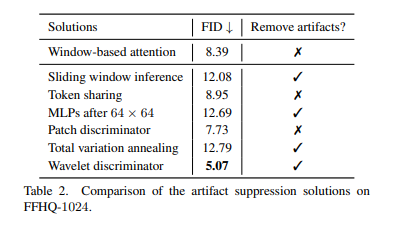

Out of them, authors states that <font color = 'orange'> Wavelet Discriminator </font> effectively supresses the artifacts. See some artifacts below.

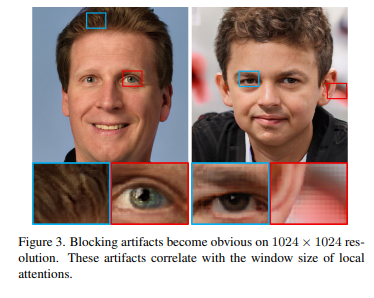

Now let's see the Wavelet Discriminator architecture.

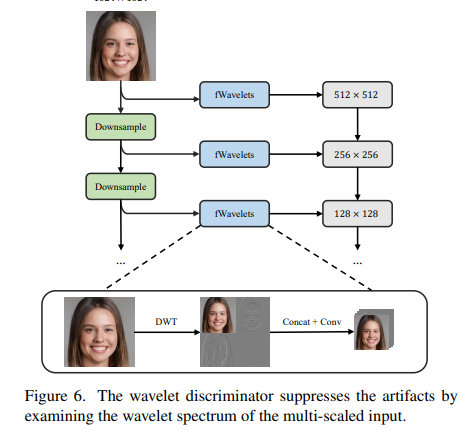

After discrete wavelet decomposition, the discriminator downsamples the input picture hierarchically and checks the frequency difference relative to actual images on each scale. When it comes to blocking artifacts, a wavelet discriminator like this works great. Meanwhile, it has no negative impacts on distribution matching, successfully leading the generator to create detailed information.

~~~
                                            How to train Discriminator?
~~~
As a loss function discriminator uses `Discriminator Logistic Loss`:

$\ell (fake, real) = \frac{1}{n}\sum_{i=1}^n ln(1 + exp(real)) + ln(1 + exp(-fake))$ 

Which is nothing but softplus function on real predictions summed with softplus function on negative fake predictions and taking the mean of them.

**Simplification**

We have simplified some methodologies adopted in the paper. 

Paper has proposed the usage of wavelet (haard) transformations in order to mitigate blocking artifacts in high resolution (1024x1024) image generation. However, we have skipped this part for version-1 which we have aimed to focus on fixing the bugs and generating low resolution images (256x256).


**Results**

No results for version-1. We have created the network pipeline. Unfortunately we could not train the model due to some complications.